In [70]:
import os, sys, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

In [159]:
def load():
    cwd = os.getcwd()
    src = os.path.join(cwd,"test")
    assert(os.path.exists(src))
    json_list = []
    storage = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    for fname in os.listdir(src):
        print(fname)
        
        with open(os.path.join(src, fname), 'r') as f: 
            content = f.read()
            jsonObj = json.loads(content)
            temp = fname.split(" ")[0]
            prefixes = temp.split("_")
            #['AxiosRequest', 'serial', 'true', '100', 'small']
            lvl3 = prefixes[0]
            lvl2 = prefixes[1]+'='+prefixes[2]
            lvl1 = prefixes[3]+"="+prefixes[4]
            storage[lvl1][lvl2][lvl3] = jsonObj
                    
            json_list.append({"name": fname, "content": jsonObj})
    return storage
            
    
from matplotlib.pyplot import figure
def hist(jsonObj, title, n_bins=10):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    for k in jsonObj.keys():
        data = jsonObj[k]
        label = "{0} μ={1:.3e} σ²={2:.3e}".format(k, np.mean(data), np.var(data))
        res = plt.hist(data, n_bins, label=label, alpha=0.5)


    plt.legend()
    plt.title(title)
    plt.ylabel("frequency")
    plt.xlabel("latency (sec)")
    plt.show()

AxiosRequest_serial_true_100_small (12).txt
AxiosRequest_serial_true_1_large (9).txt
SuperagentRequest_serial_true_10_medium (9).txt
AxiosRequest_serial_true_10_medium (9).txt
SuperagentRequest_serial_true_100_small (12).txt
SuperagentRequest_serial_true_1_large (9).txt
 


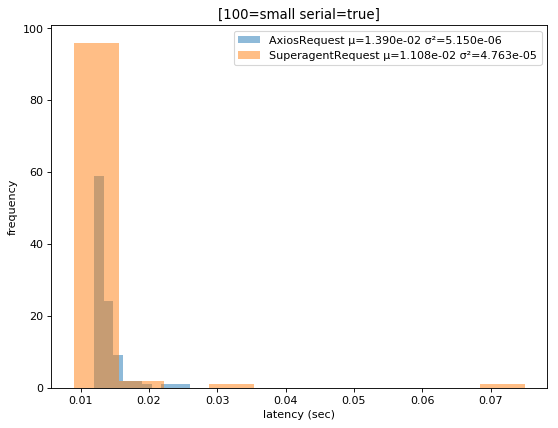

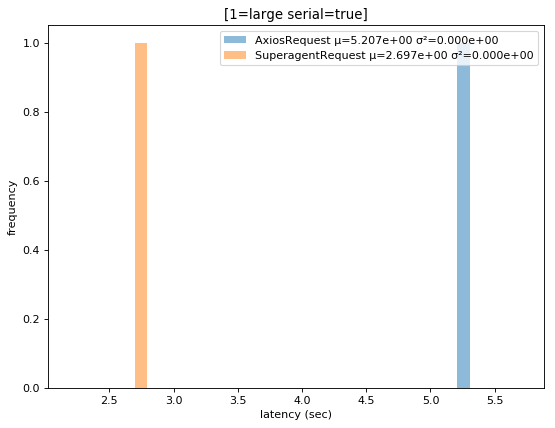

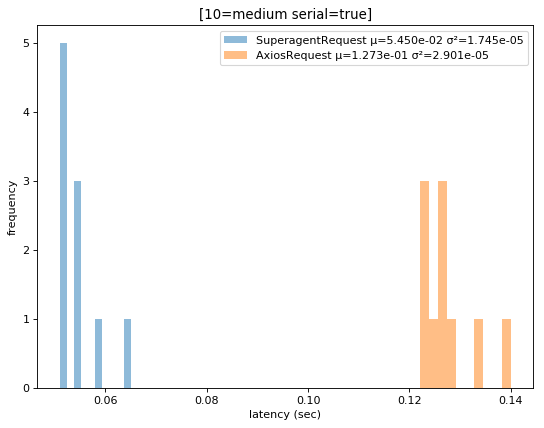

In [160]:

storage = load()
print(" ")

for k in storage.keys():
    for k2 in storage[k].keys():
        jsonObj = storage[k][k2]
        name = "[{} {}]".format(k, k2)
        hist(jsonObj, name)




In [145]:
"abc".split(" ")[0]

'abc'

In [82]:
ff = defaultdict(lambda: defaultdict(list))

In [86]:
ff[1][2]
ff[1][3][4] = [2]

IndexError: list assignment index out of range